# Introduction

Classification algorithms are used to categorize data into a class or category. <br>
It can be performed on both structured or unstructured data.<br>
Classification can be of three types: binary classification, multiclass classification, multilabel classification.

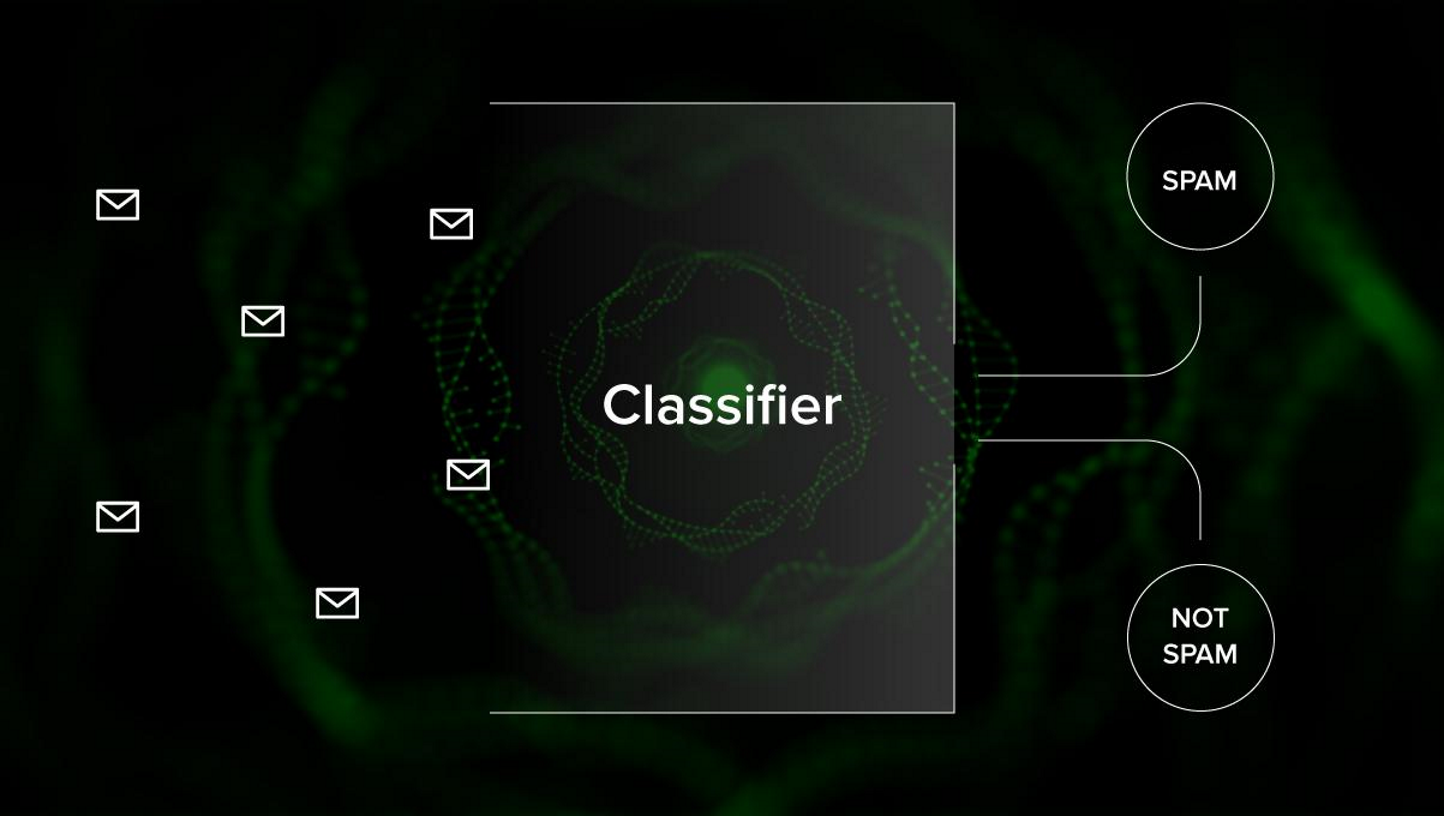

In the above image, you can see that emails are being categorized as spam or not spam. So, it is an example of classification (binary classification).<br>

The algorithms we are going to cover are:
1. Logistic regression
2. Naive Bayes
3. K-Nearest Neighbors
4. Support Vector Machine
5. Decision Tree

We will look at all algorithms with a small code applied on the iris dataset which is used for classification tasks. Dataset has 150 instances(rows), 4 features(columns) and does not contain any null value. There are 3 classes in the iris dataset:<br>
- Iris Setosa
- Iris Versicolour
- Iris Virginica


## 1. Logistic Regression

It is a very basic yet important classification algorithm in machine learning that uses one or more independent variables to determine an outcome. Logistic regression tries to find a best-fitting relationship between the dependent variable and a set of independent variables. The best-fitting line in this algorithm looks like S-shape as shown in the figure.

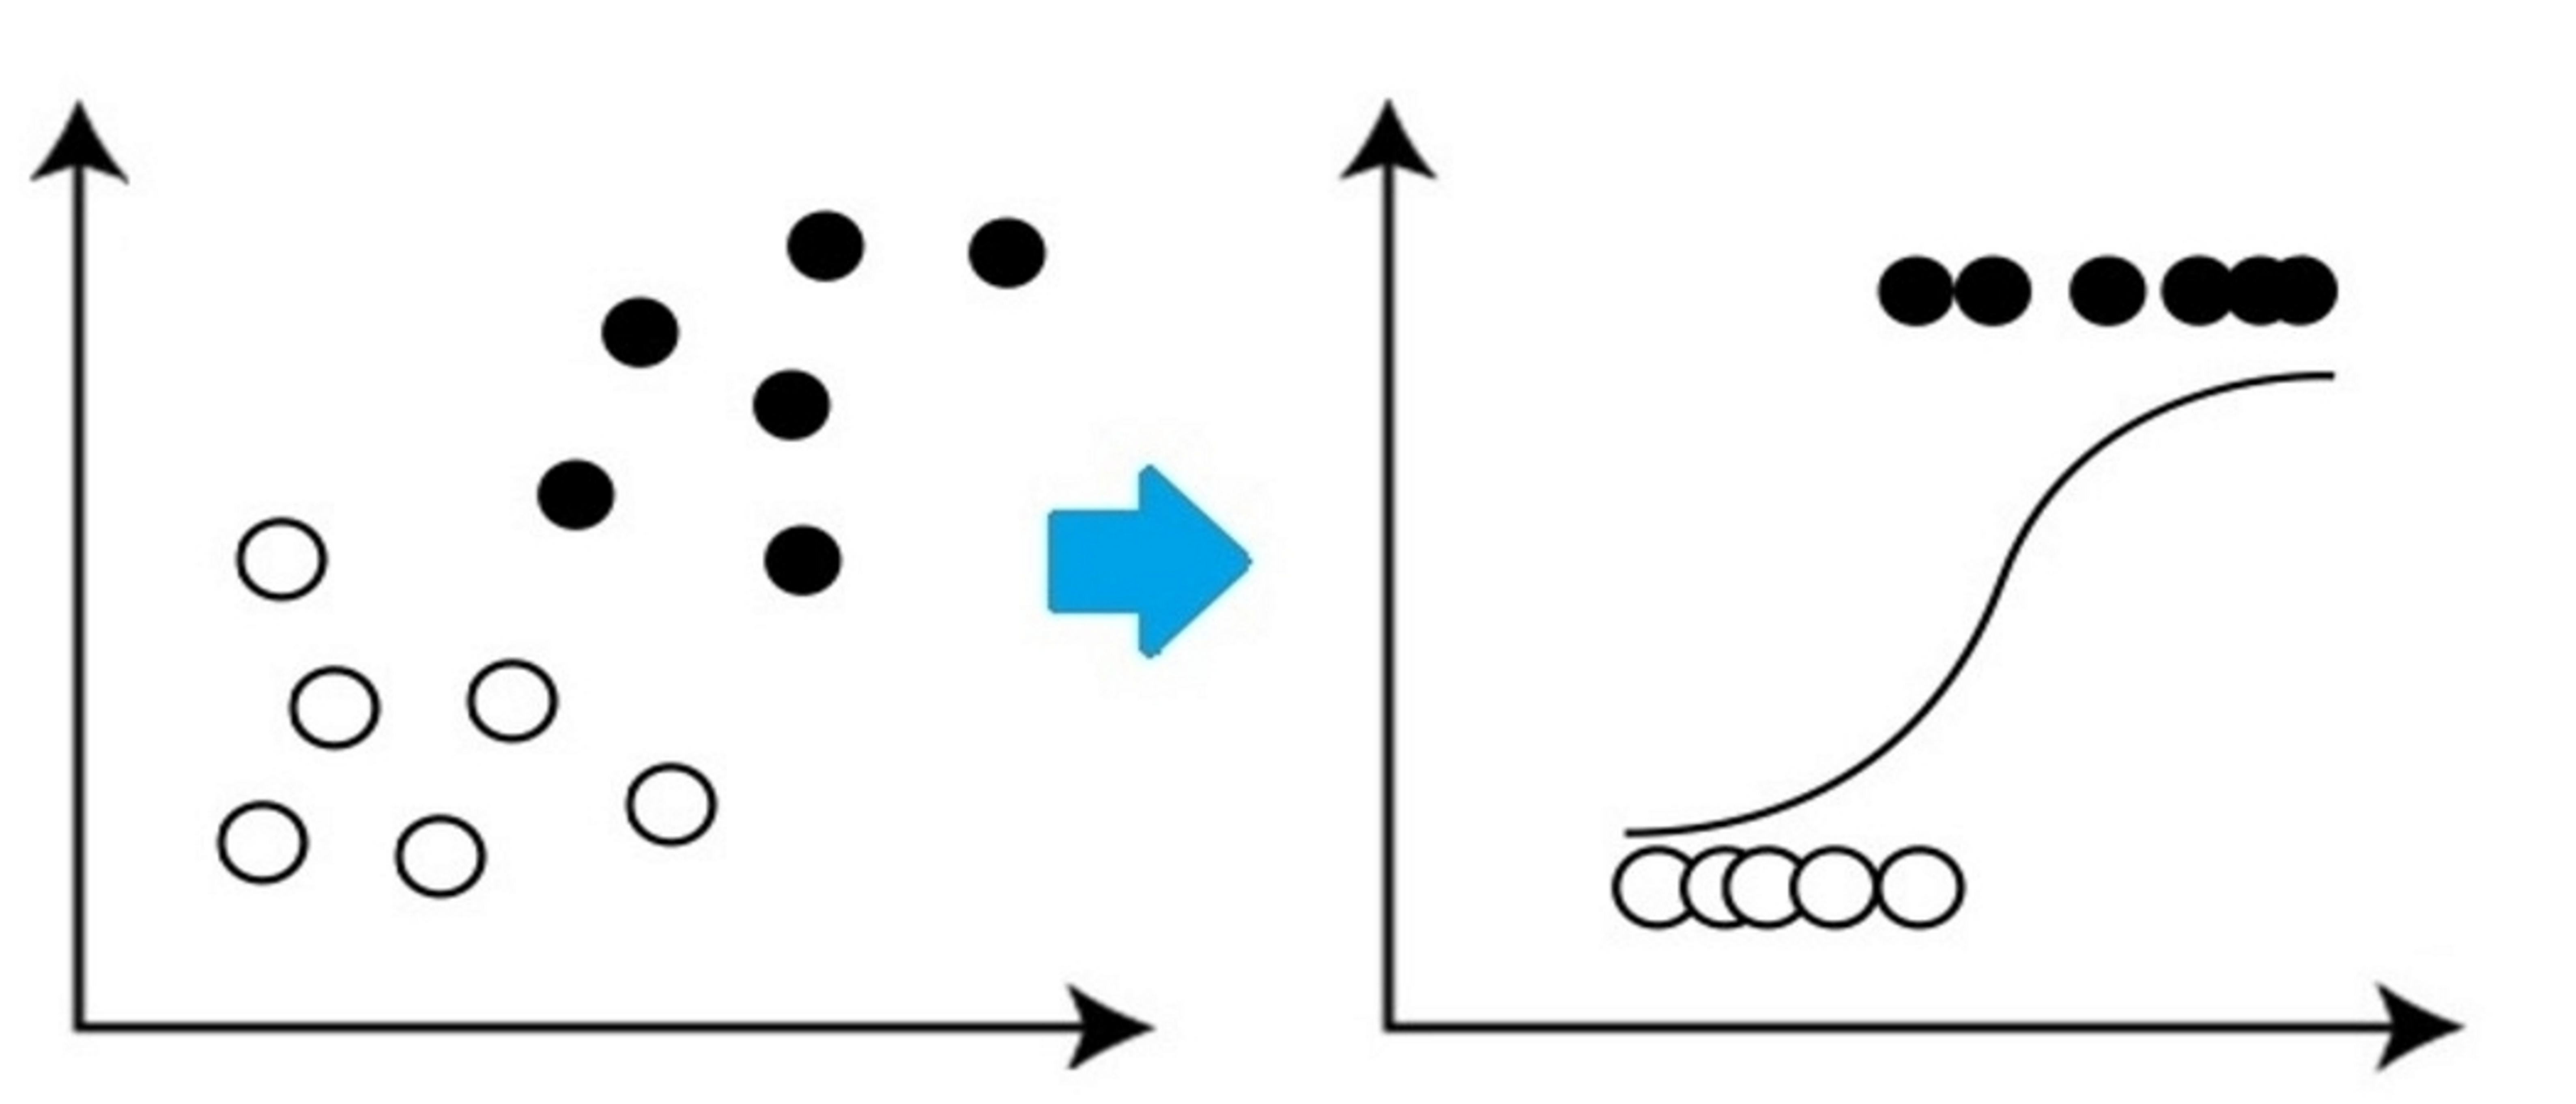

**Pros:**
- It is a very simple and efficient algorithm.
- Low variance.
- Provides probability score for observations.

**Cons:**
- Bad at handling a large number of categorical features.
- It assumes that the data is free of missing values and predictors are independent of each other.

In [6]:
# Example:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
LR_classifier = LogisticRegression(random_state=0)
LR_classifier.fit(X, y)
print(LR_classifier.predict(X[:3, :]))

# Output:
# array([0, 0, 0])
# It predicted 0 class for all 3 tests given to predict function.

[0 0 0]


c:\Users\ketan\Anaconda3\envs\nlp_v2\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 2. Naive Bayes

It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.<br>
For example, a fruit may be considered to be an apple if it is red, round, and about 3 inches in diameter. Even if these features depend on each other or upon the existence of the other features, all of these properties independently contribute to the probability that this fruit is an apple and that is why it is known as ‘Naive’.<br>
Naive Bayes model is easy to build and particularly useful for very large data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods.<br>

Bayes theorem provides a way of calculating posterior probability P(c|x) from P(c), P(x) and P(x|c). Look at the equation below:

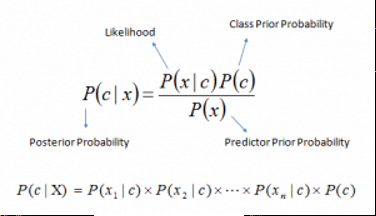

Above,
- P(c|x) is the posterior probability of class (c, target) given predictor (x, attributes).
- P(c) is the prior probability of class.
- P(x|c) is the likelihood which is the probability of predictor given class.
- P(x) is the prior probability of predictor.

### How Naive Bayes algorithm works?

Let’s understand it using an example. Below I have a training data set of weather and corresponding target variable ‘Play’ (suggesting possibilities of playing). Now, we need to classify whether players will play or not based on weather condition. Let’s follow the below steps to perform it.<br>

1. Convert the data set into a frequency table
2. Create Likelihood table by finding the probabilities like Overcast probability = 0.29 and probability of playing is 0.64.

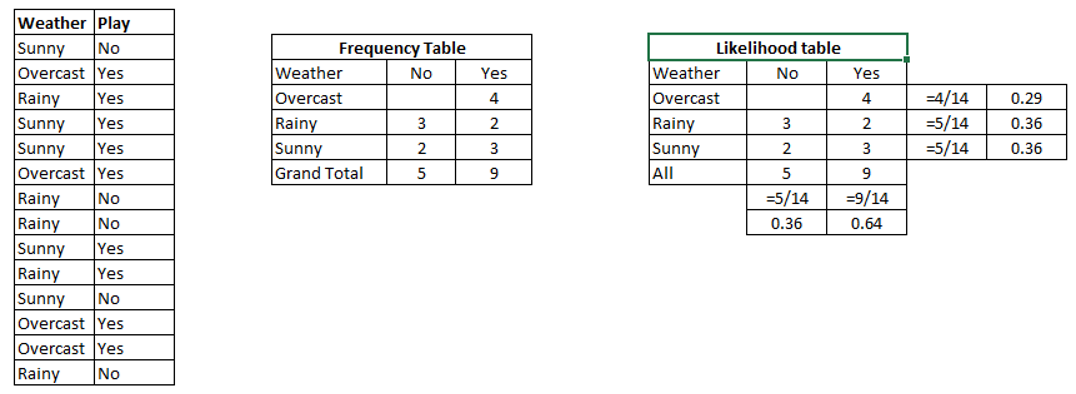

3. Now, use Naive Bayesian equation to calculate the posterior probability for each class. The class with the highest posterior probability is the outcome of prediction.

**Problem:** Players will play if weather is sunny. Is this statement is correct?<br>
We can solve it using above discussed method of posterior probability.<br>
P(Yes | Sunny) = P( Sunny | Yes) * P(Yes) / P (Sunny)<br>
Here we have P (Sunny |Yes) = 3/9 = 0.33, P(Sunny) = 5/14 = 0.36, P( Yes)= 9/14 = 0.64<br>
Now, P (Yes | Sunny) = 0.33 * 0.64 / 0.36 = 0.60, which has higher probability.<br>
Naive Bayes uses a similar method to predict the probability of different class based on various attributes. This algorithm is mostly used in text classification and with problems having multiple classes<br>

**Pros:**
- It is easy and fast to predict class of test data set. It also perform well in multi class prediction
- When assumption of independence holds, a Naive Bayes classifier performs better compare to other models like logistic regression and you need less training data.
- It perform well in case of categorical input variables compared to numerical variable(s). For numerical variable, normal distribution is assumed (bell curve, which is a strong assumption).

**Cons:**
- If categorical variable has a category (in test data set), which was not observed in training data set, then model will assign a 0 (zero) probability and will be unable to make a prediction. This is often known as “Zero Frequency”. To solve this, we can use the smoothing technique. One of the simplest smoothing techniques is called Laplace estimation.
- On the other side naive Bayes is also known as a bad estimator, so the probability outputs from predict_proba are not to be taken too seriously.
- Another limitation of Naive Bayes is the assumption of independent predictors. In real life, it is almost impossible that we get a set of predictors which are completely independent.

### Applications
- **Real time Prediction:** Naive Bayes is an eager learning classifier and it is sure fast. Thus, it could be used for making predictions in real time.
- **Multi class Prediction:** This algorithm is also well known for multi class prediction feature. Here we can predict the probability of multiple classes of target variable.
- **Text classification/ Spam Filtering/ Sentiment Analysis:** Naive Bayes classifiers mostly used in text classification (due to better result in multi class problems and independence rule) have higher success rate as compared to other algorithms. As a result, it is widely used in Spam filtering (identify spam e-mail) and Sentiment Analysis (in social media analysis, to identify positive and negative customer sentiments)
- **Recommendation System:** Naive Bayes Classifier and Collaborative Filtering together builds a Recommendation System that uses machine learning and data mining techniques to filter unseen information and predict whether a user would like a given resource or not

Again, scikit learn (python library) will help here to build a Naive Bayes model in Python. There are three types of Naive Bayes model under the scikit-learn library:
- **Gaussian:** It is used in classification and it assumes that features follow a normal distribution.
- **Multinomial:** It is used for discrete counts. For example, let’s say,  we have a text classification problem. Here we can consider Bernoulli trials which is one step further and instead of “word occurring in the document”, we have “count how often word occurs in the document”, you can think of it as “number of times outcome number x_i is observed over the n trials”.
- **Bernoulli:** The binomial model is useful if your feature vectors are binary (i.e. zeros and ones). One application would be text classification with ‘bag of words’ model where the 1s & 0s are “word occurs in the document” and “word does not occur in the document” respectively.


In [14]:
# Example:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=142)
Naive_Bayes = GaussianNB()
Naive_Bayes.fit(X_train, y_train)
prediction_results = Naive_Bayes.predict(X_test)  
print(prediction_results)
# Output:
# array([0, 1, 1, 2, 1, 1, 0, 0, 2, 1, 1, 1, 2, 0, 1, 0, 2, 1, 1, 2, 2, 1,0, 1, 2, 1, 2, 2, 0, 1, 2,
#      1, 2, 1, 2, 2, 1, 2])
# These are the classes predicted for X_test data by our naive Bayes model.

[0 1 1 2 1 1 0 0 2 1 1 1 2 0 1 0 2 1 1 2 2 1 0 1 2 1 2 2 0 1 2 1 2 1 2 2 1
 2]


## 3. K-Nearest Neighbor Algorithm
K Nearest Neighbor algorithm falls under the Supervised Learning category and is used for classification (most commonly) and regression. It is a versatile algorithm also used for imputing missing values and resampling datasets. As the name (K Nearest Neighbor) suggests it considers K Nearest Neighbors (Data points) to predict the class or continuous value for the new Datapoint.<br>

The algorithm’s learning is:<br>
1. **Instance-based learning:** Here we do not learn weights from training data to predict output (as in model-based algorithms) but use entire training instances to predict output for unseen data.
2. **Lazy Learning:** Model is not learned using training data prior and the learning process is postponed to a time when prediction is requested on the new instance.
3. **Non-Parametric:** In KNN, there is no predefined form of the mapping function.

### How does KNN Work?
Consider the following figure. Let us say we have plotted data points from our training set on a two-dimensional feature space. As shown, we have a total of 6 data points (3 red and 3 blue). Red data points belong to ‘class1’ and blue data points belong to ‘class2’. And yellow data point in a feature space represents the new point for which a class is to be predicted. Obviously, we say it belongs to ‘class1’ (red points)
Why?
Because its nearest neighbors belong to that class!

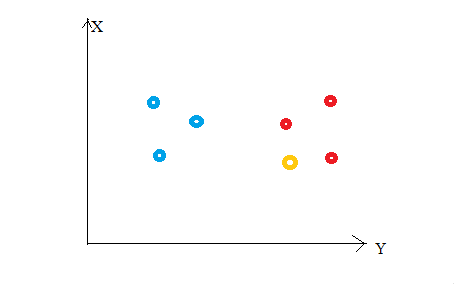

Yes, this is the principle behind K Nearest Neighbors. Here, nearest neighbors are those data points that have minimum distance in feature space from our new data point. And K is the number of such data points we consider in our implementation of the algorithm. Therefore, distance metric and K value are two important considerations while using the KNN algorithm. Euclidean distance is the most popular distance metric. You can also use Hamming distance, Manhattan distance, Minkowski distance as per your need. For predicting class/ continuous value for a new data point, it considers all the data points in the training dataset. Finds new data point’s ‘K’ Nearest Neighbors (Data points) from feature space and their class labels or continuous values.<br>
Then:<br>
**For classification:** A class label assigned to the majority of K Nearest Neighbors from the training dataset is considered as a predicted class for the new data point.<br>
**For regression:** Mean or median of continuous values assigned to K Nearest Neighbors from training dataset is a predicted continuous value for our new data point<br>

**Here, we do not learn weights and store them, instead, the entire training dataset is stored in the memory. Therefore, model representation for KNN is the entire training dataset.**

### How to choose the value for K?
K is a crucial parameter in the KNN algorithm. Some suggestions for choosing K Value are:
1. Using error curves: The figure below shows error curves for different values of K for training and test data.

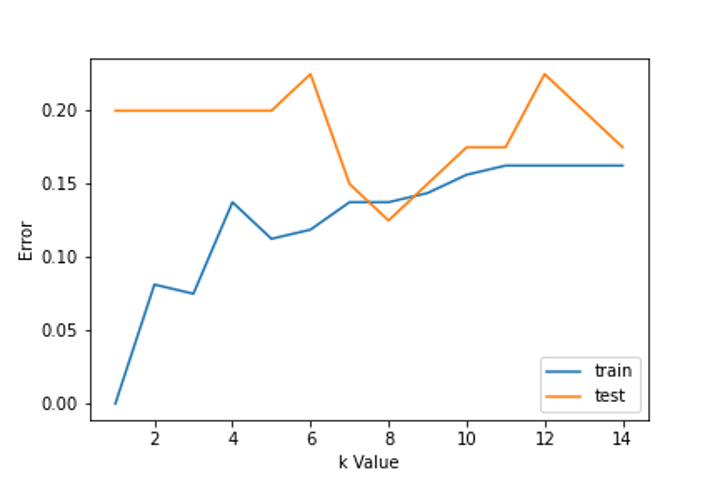

At low K values, there is overfitting of data/high variance. Therefore test error is high and train error is low. At K=1 in train data, the error is always zero, because the nearest neighbour to that point is that point itself. Therefore though training error is low test error is high at lower K values. This is called overfitting. As we increase the value for K, the test error is reduced.<br>
But after a certain K value, bias/ underfitting is introduced and test error goes high. So we can say initially test data error is high(due to variance) then it goes low and stabilizes and with further increase in K value, it again increases(due to bias). The K value when test error stabilizes and is low is considered as optimal value for K. From the above error curve we can choose K=8 for our KNN algorithm implementation.

2. Also, domain knowledge is very useful in choosing the K value.
3. K value should be odd while considering binary(two-class) classification.

### Required Data Preparation:
1. **Data Scaling:** To locate the data point in multidimensional feature space, it would be helpful if all features are on the same scale. Hence normalization or standardization of data will help.
2. **Dimensionality Reduction:** KNN may not work well if there are too many features. Hence dimensionality reduction techniques like feature selection, principal component analysis can be implemented.
3. **Missing value treatment:** If out of M features one feature data is missing for a particular example in the training set then we cannot locate or calculate distance from that point. Therefore deleting that row or imputation is required.

0.9


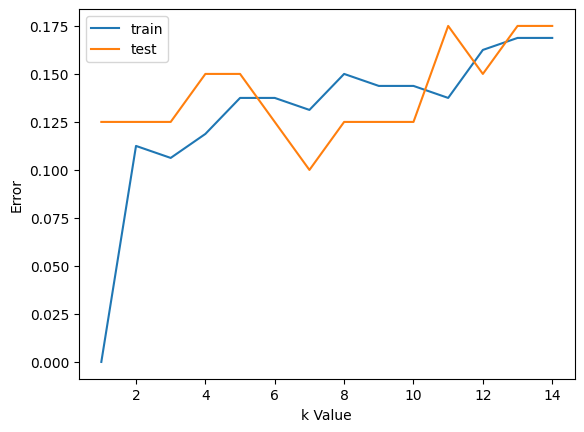

In [9]:
# Python implementation:
# Implementation of the K Nearest Neighbor algorithm using Python’s scikit-learn library:
# Step 1: Get and prepare data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
# After loading important libraries, we create our data using sklearn.datasets with 200 samples, 8 features, and 2 classes. 
# Then data is split into the train(80%) and test(20%) data and scaled using StandardScaler.
X,Y=make_classification(n_samples= 200,n_features=8,n_informative=8,n_redundant=0,n_repeated=0,n_classes=2,random_state=14)
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size= 0.2,random_state=32)
sc= StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
sc.fit(X_test)
X_test= sc.transform(X_test)
X.shape
# (200, 8)

# Step 2: Find the value for K
# For choosing the K value, we use error curves and K value with optimal variance, 
# and bias error is chosen as K value for prediction purposes. 
# With the error curve plotted below, we choose K=7 for the prediction 
error1= []
error2= []
for k in range(1,15):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1= knn.predict(X_train)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(X_test)
    error2.append(np.mean(y_test!= y_pred2))
# plt.figure(figsize(10,5))
plt.plot(range(1,15),error1,label="train")
plt.plot(range(1,15),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

# Error Curve for train and test set
# Step 3: Predict:
# In step 2, we have chosen the K value to be 7. 
# Now we substitute that value and get the accuracy score = 0.9 for the test data.
knn= KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred= knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))
# 0.9


## Pseudocode for K Nearest Neighbor (classification):
This is pseudocode for implementing the KNN algorithm from scratch:
1. Load the training data.
2. Prepare data by scaling, missing value treatment, and dimensionality reduction as required.
3. Find the optimal value for K:
4. Predict a class value for new data:
    1. Calculate distance(X, Xi) from i=1,2,3,….,n.
where X= new data point, Xi= training data, distance as per your chosen distance metric.
    2. Sort these distances in increasing order with corresponding train data.
    3. From this sorted list, select the top ‘K’ rows.

Find the most frequent class from these chosen ‘K’ rows. This will be your predicted class.

## 4. SVM

SVM stands for Support Vector Machine. This is a supervised machine learning algorithm that is very often used for both classification and regression challenges. However, it is mostly used in classification problems. <br>
The basic concept of the Support Vector Machine and how it works can be best understood by this simple example.<br> 
So, just imagine you have two tags: green and blue, and our data has two features: x and y. We want a classifier that, given a pair of (x,y)coordinates, outputs if it’s either green or blue. Plot labeled training data on a plane and then try to find a plane (hyperplane of dimensions increases) that segregates data points of both colors very clearly.

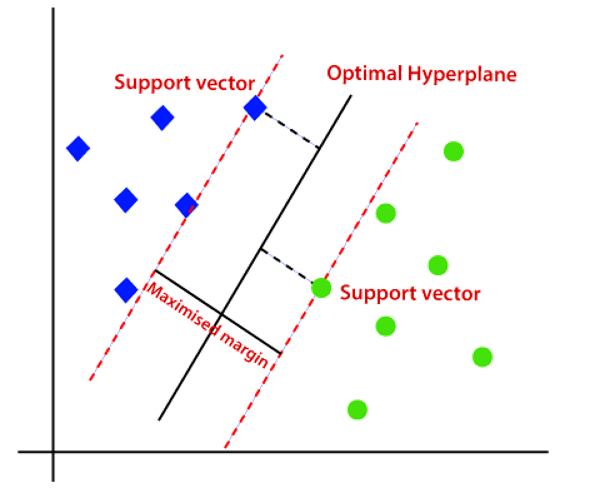

But this is the case with data that is linear. But what if data is non-linear, then it uses kernel trick. So, to handle this we increase dimension, this brings data in space and now data becomes linearly separable in two groups.<br>

**Pros:**
- SVM works relatively well when there is a clear margin of separation between classes.
- SVM is more effective in high-dimensional spaces.<br>

**Cons:**
- SVM  is not suitable for large data sets.
- SVM does not perform very well when the data set has more noise i.e. when target classes are overlapping. So, it needs to be handled.

In [15]:
# Example:
from sklearn import svm
from sklearn.model_selection import train_test_split
svm_clf = svm.SVC()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=142)
svm_clf.fit(X_train, y_train)
prediction_results = svm_clf.predict(X_test[:7,:])
print(prediction_results)
# Output:
# array([0, 1, 1, 2, 1, 1, 0])

[0 1 1 2 1 1 0]


## 5.Decision Tree
The decision tree is one of the most popular machine learning algorithms used. They are used for both classification and regression problems. Decision trees mimic human-level thinking so it’s so simple to understand the data and make some good intuitions and interpretations. They actually make you see the logic for the data to interpret. Decision trees are not like black-box algorithms like SVM, Neural Networks, etc.

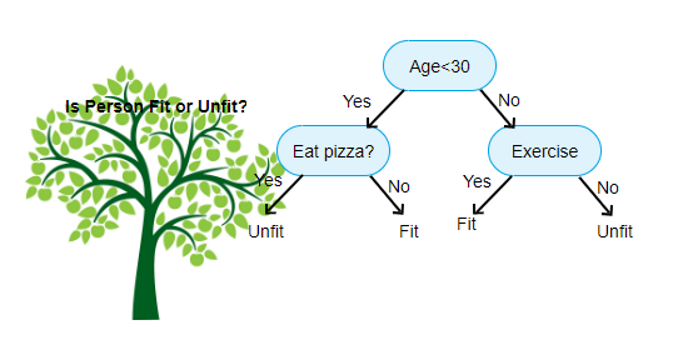

For example, if we are classifying a person as fit or unfit then the decision tree looks like somewhat this above in the image.
So, in short, a decision tree is a tree where each node represents a feature/attribute, each branch represents a decision, a rule, and each leaf represents an outcome. This outcome may be categorical or continuous value. Categorical in case of classification and continuous in case of regression applications.<br>

**Pros:**
- When compared to other algorithms, decision trees require less effort for data preparation while pre-processing.
- They do not require normalization of data and scaling as well.
- Model made on decision tree is very intuitive and easy to explain to technical teams as well as to stakeholders also.

**Cons:**
- If even a small change is done in the data, that can lead to a large change in the structure of the decision tree causing instability.
- Sometimes calculation can go far more complex compared to other algorithms.
- Decision trees often take higher time to train the model.

In [16]:
# Example:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=142)
dtc.fit(X_train, y_train)
prediction_results = dtc.predict(X_test[:7,:])
print(prediction_results)
# Output:
# array([0, 1, 1, 2, 1, 1, 0])

[0 1 1 2 1 1 0]
